<a href="https://colab.research.google.com/github/LinkRoxo/TCC/blob/main/Testes/Croppando_quadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir /content/croped

In [ ]:
import cv2
import numpy as np
import argparse
import imutils
from PIL import ImageFont, ImageDraw, Image
from google.colab.patches import cv2_imshow

fonte = '/calibri.ttf'

In [ ]:
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [ ]:
def draw_contour(image, c, i):
	# compute the center of the contour area and draw a circle
	# representing the center
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
	# draw the countour number on the image
	cv2.putText(image, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), 2)
	# return the image with the contour number drawn on it
	return image

In [ ]:
def caixa_texto(x, y, w, h, img, cor = (255, 100, 0)):
  '''   x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i] '''

  cv2.rectangle(img, (x, y), (x+w, y+h), cor, 2)

  return x, y, img

In [ ]:
def box_extraction(img_for_box_extraction_path, cropped_dir_path):
  color = (255, 0, 0)
  original = cv2.imread(img_for_box_extraction_path)
  img = cv2.imread(img_for_box_extraction_path, 0)  # Read the image
  (thresh, img_bin) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # Thresholding the image
  img_bin = 255-img_bin  # Invert the imagecv2.imwrite("Image_bin.jpg",img_bin)

  # Defining a kernel length
  kernel_length = np.array(img).shape[1]//40

  # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
  verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
  # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
  hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
  # A kernel of (3 X 3) ones.
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))# Morphological operation to detect verticle lines from an image
  img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
  verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
  cv2.imwrite("verticle_lines.jpg",verticle_lines_img)# Morphological operation to detect horizontal lines from an image
  img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
  horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
  cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
  alpha = 0.5
  beta = 1.0 - alpha
  # This function helps to add two image with specific weight parameter to get a third image as summation of two image.
  img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
  img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
  (thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)# For Debugging
  # Enable this line to see verticle and horizontal lines in the image which is used to find boxes
  cv2.imwrite("img_final_bin.jpg",img_final_bin)
  # Find contours for image, which will detect all the boxes
  contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  # Sort all the contours by top to bottom.
  (contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")
  idx = 0
  for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)# If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
    resultado = cv2.rectangle(original, (x, y), (x+w, y+h), color, 2)
    idx += 1

  cv2_imshow(resultado)

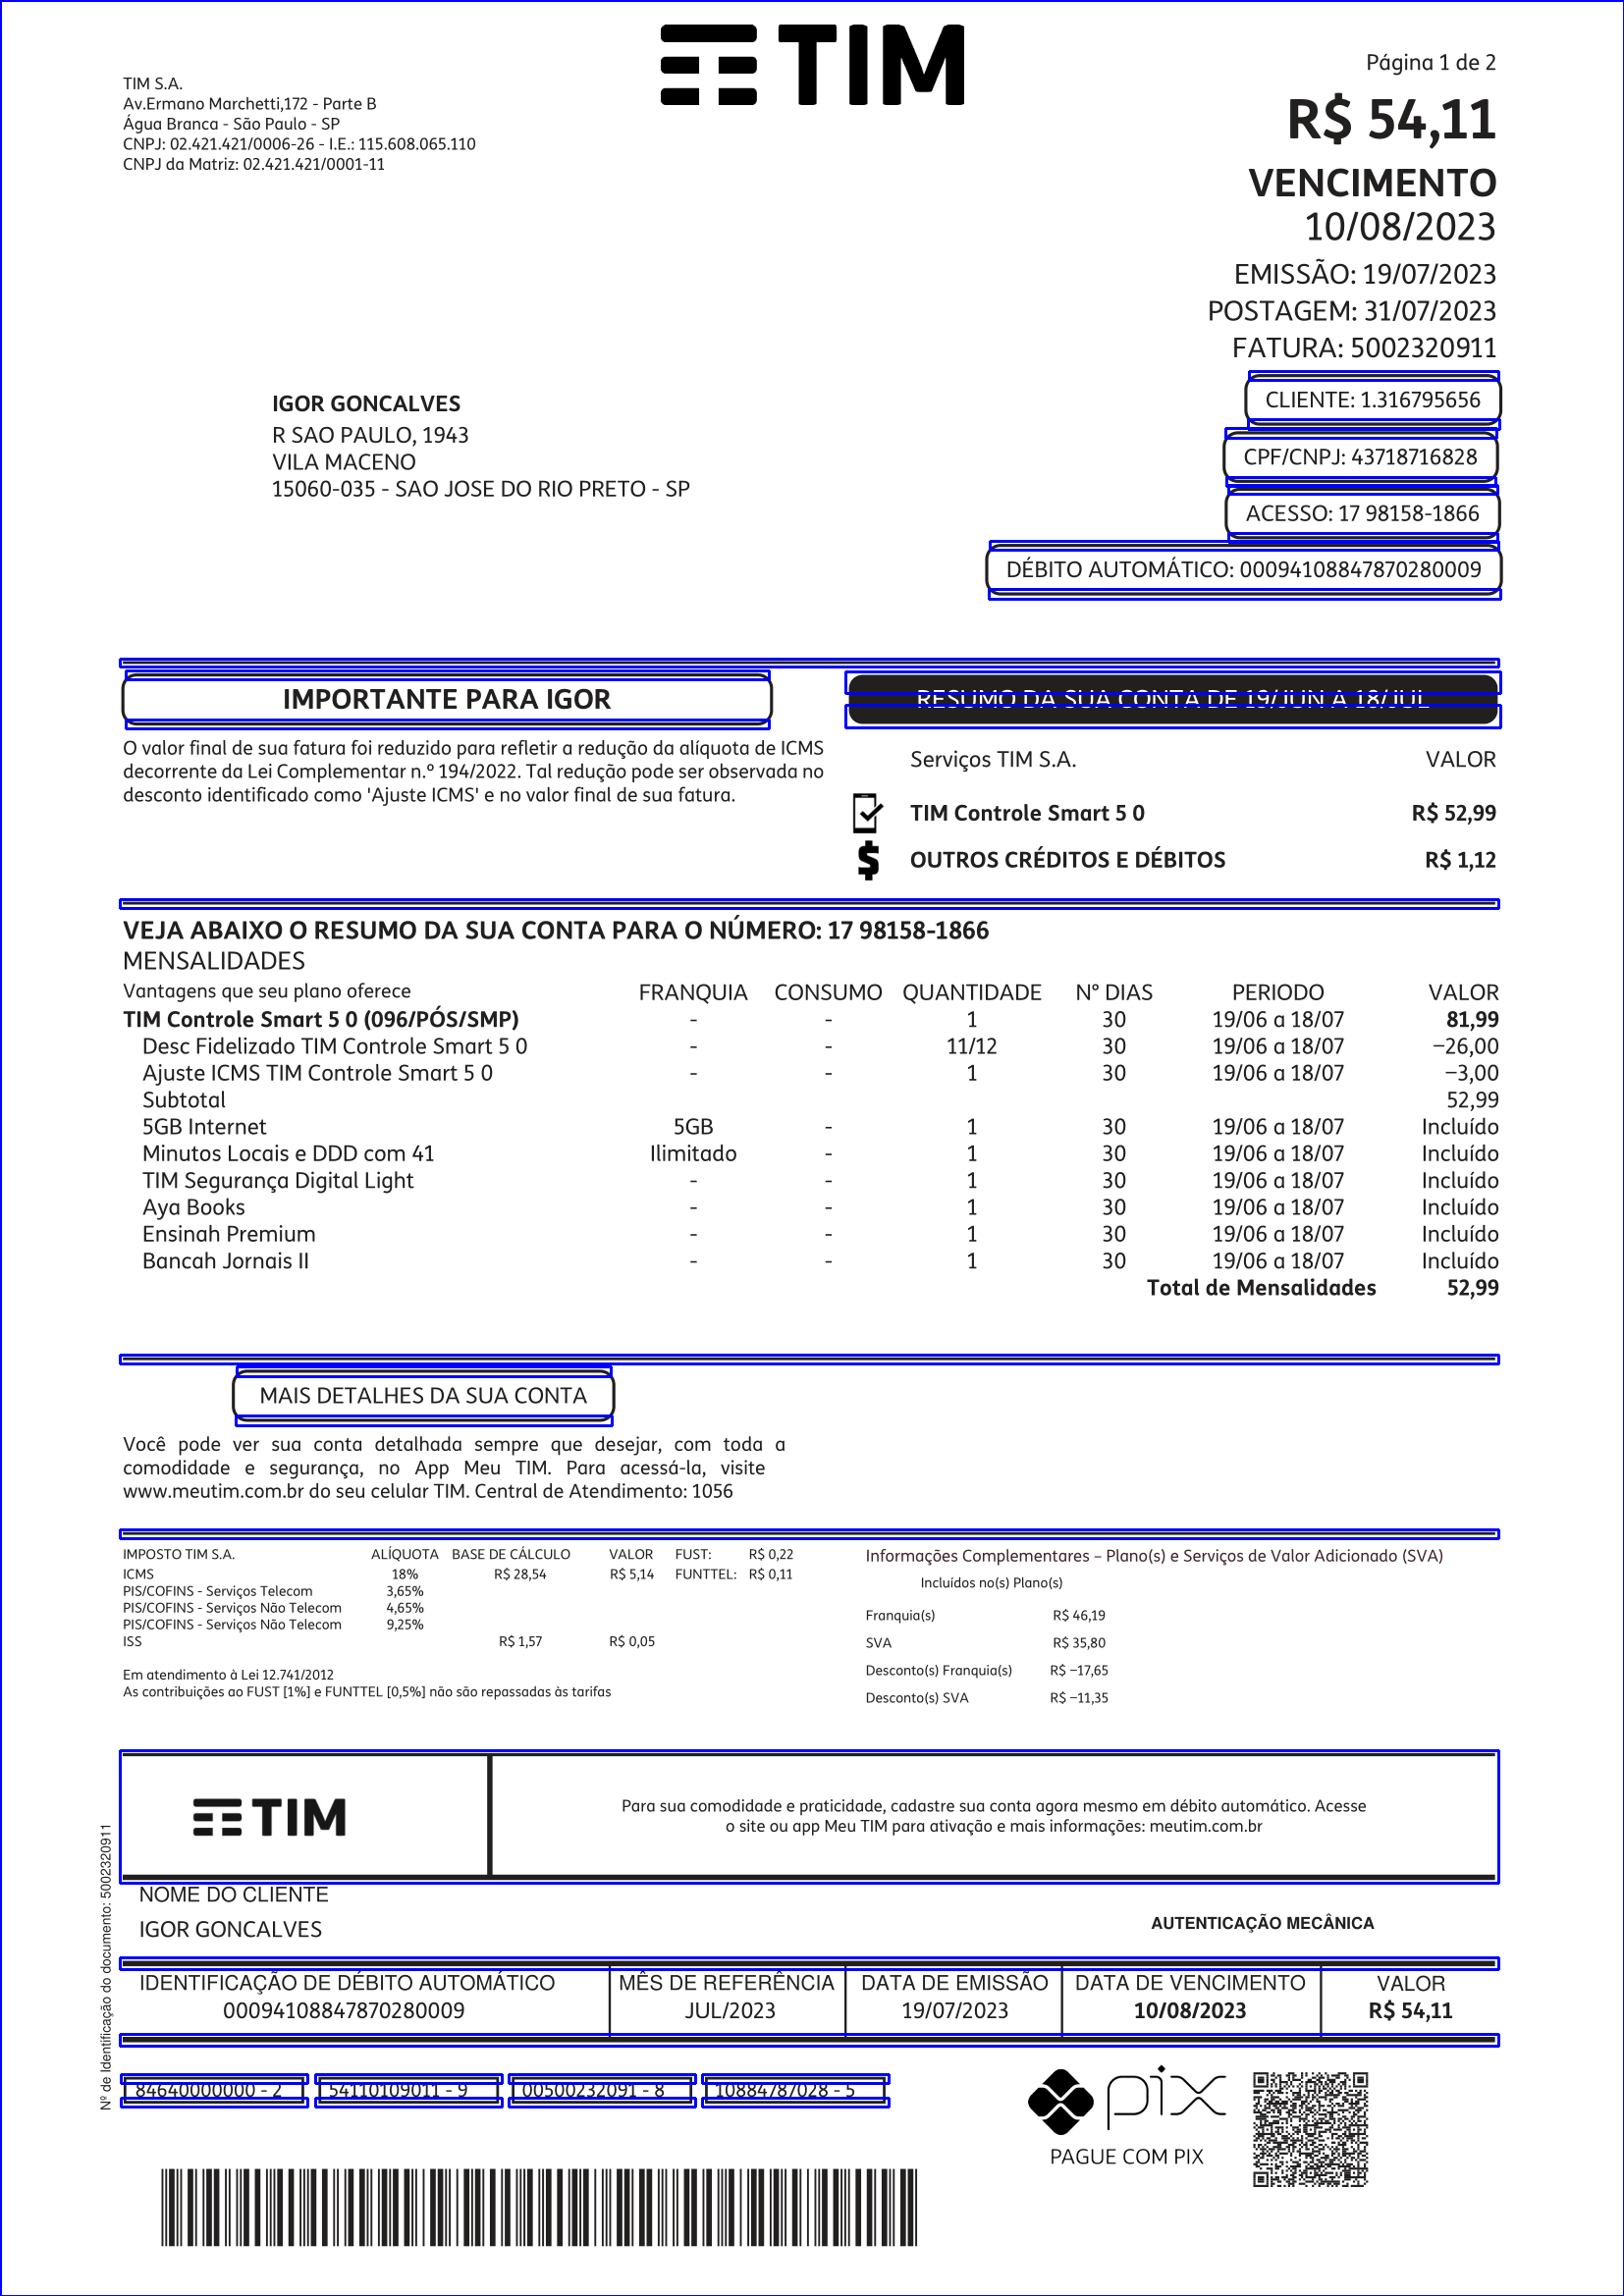

In [ ]:
box_extraction('/content/Fatura gibby-1.png', '/content/croped/')

In [ ]:
# @title
img = cv2.imread('/content/Fatura gibby-1.png', 0)

# Thresholding the image
(thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY|     cv2.THRESH_OTSU)# Invert the image
img_bin = 255-img_bin
cv2.imwrite("Image_bin.jpg",img_bin)

True

In [ ]:
# @title
# Defining a kernel length
kernel_length = np.array(img).shape[1]//80

# A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))# A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))# A kernel of (3 X 3) ones.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

In [ ]:
# @title
# Morphological operation to detect vertical lines from an image
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
cv2.imwrite("verticle_lines.jpg",verticle_lines_img)# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)

True

In [ ]:
# @title
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("img_final_bin.jpg",img_final_bin)

True

In [ ]:
# @title
img_final_bin

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
# @title
# Find contours for image, which will detect all the boxes
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)# Sort all the contours by top to bottom.
(contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")

In [ ]:
# @title
print(cv2.RETR_TREE)
print(cv2.CHAIN_APPROX_SIMPLE)

3
2


In [ ]:
# @title
idx = 0
for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    if (w > 80 and h > 20) and w > 3*h:
      idx += 1
      new_img = img[y:y+h, x:x+w]
      cv2.imwrite(cropped_dir_path+str(idx) + '.png', new_img)# If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
      if (w > 80 and h > 20) and w > 3*h:
        idx += 1
        new_img = img[y:y+h, x:x+w]
        cv2.imwrite(cropped_dir_path+str(idx) + '.png', new_img)

NameError: ignored